# Ungraded Lab: Practice with the Keras Functional API

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/TensorFlow-Advanced_Techniques_Specialization/blob/master/Custom_Models_Layers_and_Loss_Functions_with_TensorFlow/Week1/Labs/C1_W1_Lab_1_functional-practice.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

This lab will demonstrate how to build models with the Functional syntax. You'll build one using the Sequential API and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual.

## Imports

In [1]:
import tensorflow as tf
from keras import Sequential, layers, Input, Model, utils, datasets, optimizers

2024-08-21 16:08:51.073996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 16:08:51.086213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 16:08:51.089701: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 16:08:51.098740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [2]:
def build_model_with_sequential():
    # Instantiate a Sequential class and linearly stack the layers of your model
    seq_model = Sequential([layers.Flatten(input_shape=(28, 28)),
                            layers.Dense(128, activation=tf.nn.relu),
                            layers.Dense(10, activation=tf.nn.softmax)])
    
    return seq_model

## Functional API

And here is how you build the same model above with the functional syntax.

In [3]:
def build_model_with_functional():
    # Instantiate the input Tensor
    input_layer = Input(shape=(28, 28))
    
    # Stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = layers.Flatten()(input_layer)
    first_dense = layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # Declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

## Build the model and visualize the model graph

You can choose how to build your model below. Just uncomment which function you'd like to use. You'll notice that the plot will look the same.

2024-08-21 16:08:52.628104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1776 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


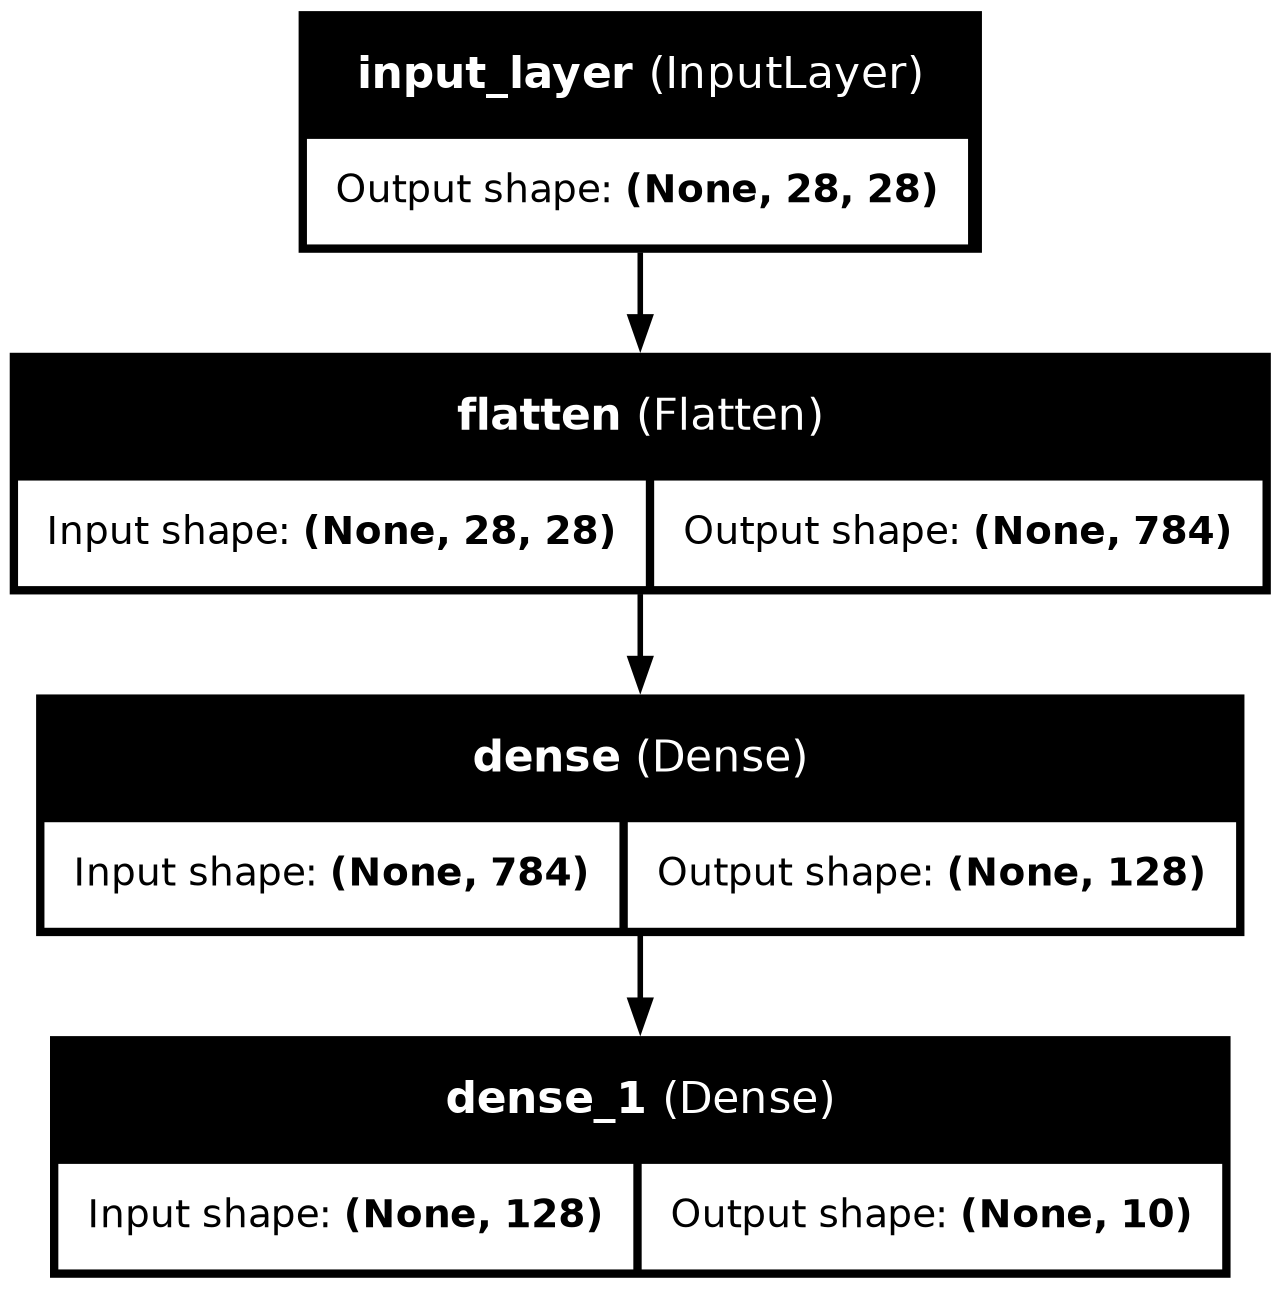

In [4]:
model = build_model_with_functional()
#model = build_model_with_sequential()

# Plot model graph
utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='./model.png')

## Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [5]:
# Prepare fashion mnist dataset
mnist = datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Configure, train, and evaluate the model
model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
loss, accuracy = model.evaluate(test_images, test_labels)

print("\n------------------------------------------------------------------------")
print("Loss =", loss)
print("Accuracy =", accuracy)

Epoch 1/5


I0000 00:00:1724278134.185068  127231 service.cc:146] XLA service 0x781064004f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724278134.185093  127231 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-08-21 16:08:54.197329: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-21 16:08:54.259072: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 203/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.6057 - loss: 1.1015

I0000 00:00:1724278134.863760  127231 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 712us/step - accuracy: 0.7751 - loss: 0.6390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8589 - loss: 0.3878
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.8769 - loss: 0.3401
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8826 - loss: 0.3156
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8921 - loss: 0.2914
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8722 - loss: 0.3448

------------------------------------------------------------------------
Loss = 0.3500242531299591
Accuracy = 0.8734999895095825


In [6]:
!rm ./model.png